In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [ ]:
# Step 1: Load Data

In [ ]:
business_df = spark.read.format("csv").load("dbfs:/FileStore/shared_uploads/dalinz@cs.aau.dk/CombinedStartupCellularData.csv",
                                           header='true',inferSchema='true')
country_df = spark.read.format("csv").load("dbfs:/FileStore/shared_uploads/dalinz@cs.aau.dk/CountryDimData.csv",
                                           header='true',inferSchema='true')

In [ ]:
# Step 2: Data Exploration

In [ ]:
# Look at the head of each of the four dataframes.
business_df.schema.names

Out[150]: ['country_name',
 'startup_cost_pct_gni_per_capita',
 'startup_time_days',
 'num_startup_procedures',
 'ease_of_business',
 'population',
 'broadband_subscriptions',
 'cellular_subscriptions',
 'percentage_pop_age_65_and_above',
 'gni_per_capita']

In [ ]:
# Look at the sizes of each dataframe
print((business_df.count(), len(business_df.columns)))

(221, 10)

In [ ]:
# What does each dataframe look like? (print top 10 rows)
business_df.take(10)

Out[152]: [Row(country_name='Benin', startup_cost_pct_gni_per_capita=3.8, startup_time_days=8.5, num_startup_procedures=6.0, ease_of_business=151.0, population=10872298.0, broadband_subscriptions=22285.0, cellular_subscriptions=8892490.0, percentage_pop_age_65_and_above=0.03235718888499929, gni_per_capita=822.1702090947102),
 Row(country_name='Euro area', startup_cost_pct_gni_per_capita=3.83, startup_time_days=9.55, num_startup_procedures=5.26, ease_of_business=None, population=340762347.0, broadband_subscriptions=117730706.0, cellular_subscriptions=418111175.0, percentage_pop_age_65_and_above=0.20203130306530023, gni_per_capita=36132.51319694661),
 Row(country_name='Kazakhstan', startup_cost_pct_gni_per_capita=0.3, startup_time_days=9.0, num_startup_procedures=5.0, ease_of_business=36.0, population=17794397.0, broadband_subscriptions=2349900.0, cellular_subscriptions=25534800.0, percentage_pop_age_65_and_above=0.06840209308581797, gni_per_capita=8812.436858635896),
 Row(country_name='Jamaica', startup_cost_pct_gni_per_capita=4.3, startup_time_days=10.0, num_startup_procedures=2.0, ease_of_business=70.0, population=2881355.0, broadband_subscriptions=286068.0, cellular_subscriptions=3267344.0, percentage_pop_age_65_and_above=0.09497059543166322, gni_per_capita=4633.075112924301),
 Row(country_name='Norway', startup_cost_pct_gni_per_capita=0.9, startup_time_days=4.0, num_startup_procedures=4.0, ease_of_business=8.0, population=5236151.0, broadband_subscriptions=2120360.0, cellular_subscriptions=5729569.0, percentage_pop_age_65_and_above=0.16592416834426663, gni_per_capita=81983.1208076314),
 Row(country_name='Iran', startup_cost_pct_gni_per_capita=1.2, startup_time_days=15.5, num_startup_procedures=9.0, ease_of_business=124.0, population=80277428.0, broadband_subscriptions=9318943.0, cellular_subscriptions=80520249.0, percentage_pop_age_65_and_above=0.05214906735676684, gni_per_capita=5466.9040966285065),
 Row(country_name='Antigua and Barbuda', startup_cost_pct_gni_per_capita=9.4, startup_time_days=22.0, num_startup_procedures=9.0, ease_of_business=107.0, population=100963.0, broadband_subscriptions=9261.0, cellular_subscriptions=180000.0, percentage_pop_age_65_and_above=0.06728207363093411, gni_per_capita=13563.786367283064),
 Row(country_name='Congo', startup_cost_pct_gni_per_capita=61.2, startup_time_days=50.0, num_startup_procedures=11.0, ease_of_business=179.0, population=5125821.0, broadband_subscriptions=None, cellular_subscriptions=5424000.0, percentage_pop_age_65_and_above=0.033829117325790345, gni_per_capita=1710.946705903308),
 Row(country_name='Argentina', startup_cost_pct_gni_per_capita=10.8, startup_time_days=24.0, num_startup_procedures=13.0, ease_of_business=117.0, population=43847430.0, broadband_subscriptions=7232053.0, cellular_subscriptions=63723692.0, percentage_pop_age_65_and_above=0.11060823861284458, gni_per_capita=11972.742758241475),
 Row(country_name='Haiti', startup_cost_pct_gni_per_capita=219.3, startup_time_days=97.0, num_startup_procedures=12.0, ease_of_business=181.0, population=10847334.0, broadband_subscriptions=1348.0, cellular_subscriptions=6504010.0, percentage_pop_age_65_and_above=0.047098485213048664, gni_per_capita=782.5222791148498)]

In [ ]:
# How is the data distributed
business_df.summary().show()

+-------+------------+-------------------------------+------------------+----------------------+------------------+--------------------+-----------------------+----------------------+-------------------------------+------------------+
summary|country_name|startup_cost_pct_gni_per_capita| startup_time_days|num_startup_procedures| ease_of_business| population|broadband_subscriptions|cellular_subscriptions|percentage_pop_age_65_and_above| gni_per_capita|
+-------+------------+-------------------------------+------------------+----------------------+------------------+--------------------+-----------------------+----------------------+-------------------------------+------------------+
 count| 221| 221| 221| 221| 177| 221| 215| 218| 216| 221|
 mean| null| 23.491447963800884|20.167104072398192| 7.036380090497739| 92.99435028248588| 3.558801289321267E8| 3.9920136726232566E7| 3.5606035487811923E8| 0.08572856193219162|11970.982776398174|
 stddev| null| 31.605901184937814|18.971095375789496| 2.705391169895263|53.836716220009876|1.0270830943346543E9| 1.2277568192710383E8| 1.0304183399920356E9| 0.05901363311053861| 16271.05331500571|
 min| Afghanistan| 0.0| 0.5| 1.0| 1.0| 21503.0| 66.0| 23412.0| 0.01084176986048607| 277.882036374168|
 25%| null| 3.8| 8.5| 5.0| 46.0| 3516816.0| 59057.0| 3713190.0| 0.03513430788159759| 1715.000226601971|
 50%| null| 13.64| 15.0| 7.0| 95.0| 1.4452543E7| 981886.0| 1.2878926E7| 0.06555928876287086| 4938.367962099808|
 75%| null| 32.4| 25.52| 8.13| 139.0| 9.5688681E7| 7232053.0| 1.13E8| 0.1343642892857347|12759.521498718877|
 max| Zimbabwe| 219.3| 149.0| 17.0| 186.0| 7.444027227E9| 9.202979851E8| 7.508993706E9| 0.26564563093597016| 82093.89575024547|
+-------+------------+-------------------------------+------------------+----------------------+------------------+--------------------+-----------------------+----------------------+-------------------------------+------------------+

In [ ]:
# Are there nulls in the data?
country_Null = {col:country_df.filter(country_df[col].isNull()).count() for col in country_df.columns}
country_Null

Out[165]: {'country_iso_code': 1,
 'wb_country_code': 0,
 'country_name': 0,
 'country_long_name': 0,
 'region': 47,
 'income_group': 47}

In [ ]:
# Are there nulls in the data?
business_Null = {col:business_df.filter(business_df[col].isNull()).count() for col in business_df.columns}
business_Null

Out[154]: {'country_name': 0,
 'startup_cost_pct_gni_per_capita': 0,
 'startup_time_days': 0,
 'num_startup_procedures': 0,
 'ease_of_business': 44,
 'population': 0,
 'broadband_subscriptions': 6,
 'cellular_subscriptions': 3,
 'percentage_pop_age_65_and_above': 5,
 'gni_per_capita': 0}

In [ ]:
# If there are nulls in "ease of business", what countries do they affect?
business_df.where(business_df["ease_of_business"].isNull()).select("country_name").distinct().show()

+--------------------+
 country_name|
+--------------------+
 Lower middle income|
 Low & middle income|
Heavily indebted ...|
Least developed c...|
 Sub-Saharan Africa|
Latin America & C...|
Europe & Central ...|
 OECD members|
 European Union|
South Asia (IDA &...|
Post-demographic ...|
 High income|
Fragile and confl...|
Early-demographic...|
Europe & Central ...|
 Euro area|
 IBRD only|
 IDA total|
 IDA & IBRD total|
Sub-Saharan Afric...|
+--------------------+
only showing top 20 rows

In [ ]:
# Step 3: Dealing with missing values

In [ ]:
# impute missing value with zero
business_df_fill_zero = business_df.fillna(0)

In [ ]:
# impute missing value with mean
from pyspark.ml.feature import Imputer
imputer = Imputer(inputCols=[item[0] for item in business_df.dtypes if not item[1].startswith('string')], 
                  outputCols=[item[0] for item in business_df.dtypes if not item[1].startswith('string')])
business_df_fill_mean = imputer.fit(business_df).transform(business_df)

In [ ]:
# use the country data (country_df) to do a "smart" mean where missing values get filled by the mean for countries in the same income group.

# Get the column names for the business dataframe
original_columns = business_df.columns

# Create a combined data frame that includes the business data, as well as the income group for each country
df_join = business_df.join(country_df['country_name', 'income_group'], on=['country_name'])

# Group by the income group, then take the mean
df_grouped = df_join.groupby('income_group').mean()

# Join the grouped data frame back to our business+country dataframe.
df_join2 = df_join.join(df_grouped, on=['income_group'])

# Fill in the missing values with the mean calculated by income group.
from pyspark.sql.functions import coalesce
df_join2.withColumn("ease_of_business", coalesce('ease_of_business', 'avg(ease_of_business)'))
df_join2.withColumn("broadband_subscriptions", coalesce('broadband_subscriptions', 'avg(broadband_subscriptions)'))
df_join2.withColumn("cellular_subscriptions", coalesce('cellular_subscriptions', 'avg(cellular_subscriptions)'))
df_join2.withColumn("percentage_pop_age_65_and_above", coalesce('percentage_pop_age_65_and_above', 'avg(percentage_pop_age_65_and_above)'))

# select original columns
business_df_fill_smart = df_join2[original_columns]

# impute unfilled with mean
from pyspark.ml.feature import Imputer
imputer = Imputer(inputCols=[item[0] for item in business_df_fill_smart.dtypes if not item[1].startswith('string')], 
                  outputCols=[item[0] for item in business_df_fill_smart.dtypes if not item[1].startswith('string')])
business_df_fill_smart = imputer.fit(business_df_fill_smart).transform(business_df_fill_smart)

In [ ]:
# Step 4: Pair plots to visulize the relationships between variables

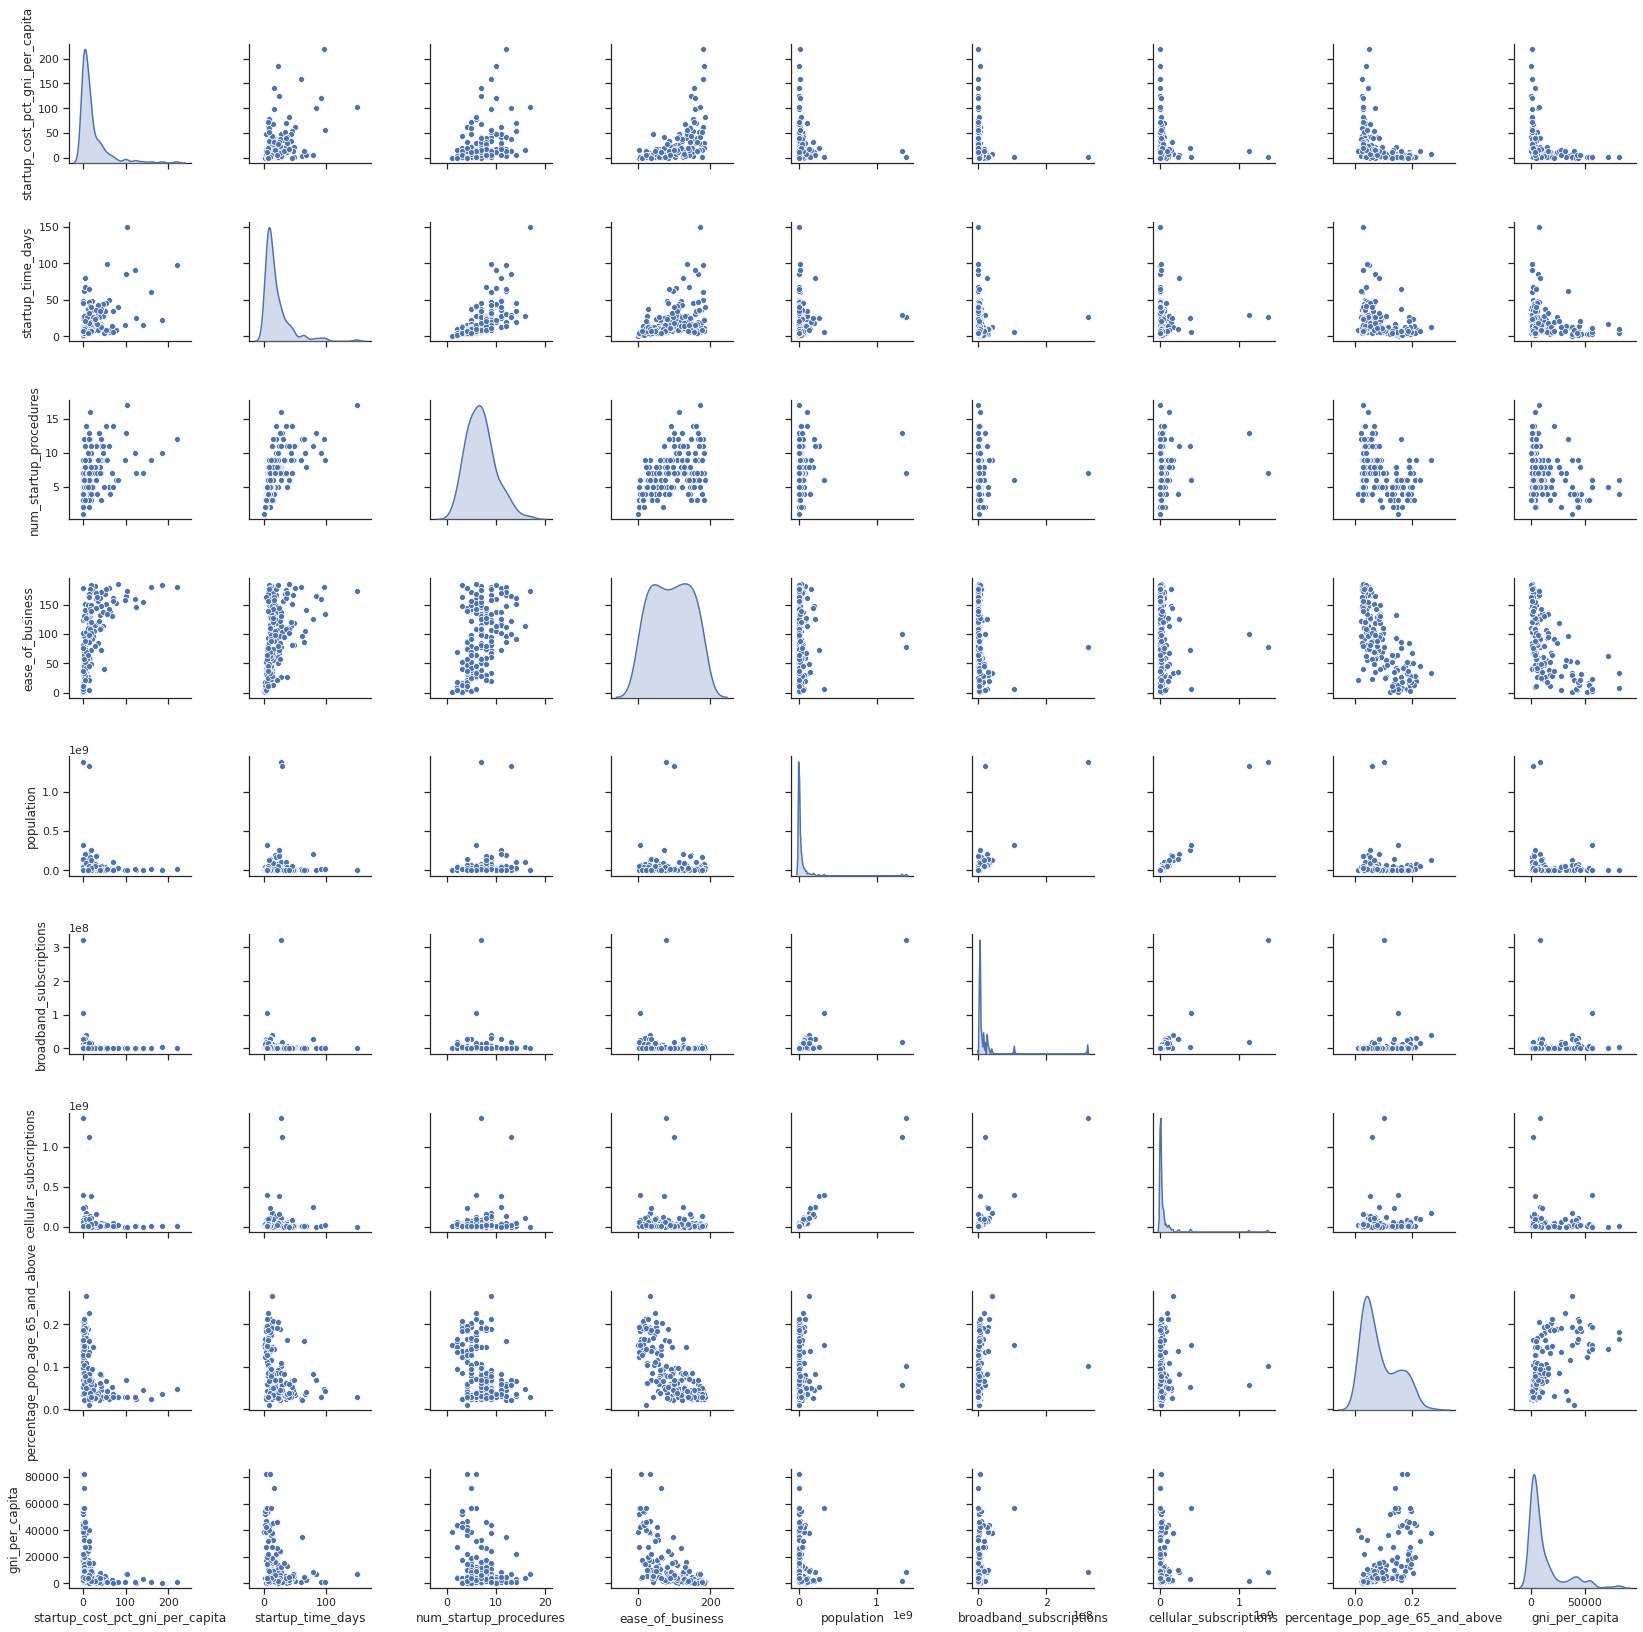

In [ ]:
# create a scatter matrix from the dataframe
import pandas as pd
import numpy as np

# convert spark dataframe to pandas dataframe for ploting
business_df_fill_smart = business_df_fill_smart.select('*').toPandas()

# use the seaborn library to plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")
sns.pairplot(business_df_fill_smart, diag_kind="kde")
plt.show()